# Project 7:Temperature Forecast Project using ML

Problem Statement:
    
Data Set Information:
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS
model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 
2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum
temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum 
air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T
    
Please note that there are two target variables here: 
1) Next_Tmax: Next day maximum temperature
2) Next_Tmin: Next day  minimum temperature


In [73]:
#loading the required libraries
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score

In [74]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [75]:
import pandas as pd
df=pd.read_csv("temperature.csv")  
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Observation: 1.There are 7752 rows and 25 columns.

2.We can see Nan values whcih  has to be convert by using imutation technique.

3.There are two target variables here:1) Next_Tmax: Next day maximum temperature and 2) Next_Tmin: Next day minimum temperature
which are numerical and continuous variable so we will consider this as a Regression problem.

In [76]:
df.head() #Checking out the top 5 rows of the dataset

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [77]:
df.shape 

(7752, 25)

#There are 7752 rows and 25 columns

In [78]:
df.dtypes #checking datatypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

We see that only Date is objective and rest features are float datatype.

In [79]:
df.columns #names of 25 features/columns names

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], dtype='object')

In [80]:
# description of the categorcal features
df.describe(include=np.object)

,Date
count,7750
unique,310
top,03-07-2013
freq,25


1.There are 310 distinct values.

2.There is two missing value in date column which can be seen from count.

In [81]:
# description of  numerical feautres description using T as Transpose to be more readable and identifiable:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7750.0,13.000000,7.211568,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7682.0,29.768211,2.969999,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7682.0,23.225059,2.413961,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7677.0,56.759372,14.668111,19.794666,45.963543,55.039024,67.190056,98.524734
LDAPS_RHmax,7677.0,88.374804,7.192004,58.936283,84.222862,89.793480,93.743629,100.000153
LDAPS_Tmax_lapse,7677.0,29.613447,2.947191,17.624954,27.673499,29.703426,31.710450,38.542255
LDAPS_Tmin_lapse,7677.0,23.512589,2.345347,14.272646,22.089739,23.760199,25.152909,29.619342
LDAPS_WS,7677.0,7.097875,2.183836,2.882580,5.678705,6.547470,8.032276,21.857621
LDAPS_LH,7677.0,62.505019,33.730589,-13.603212,37.266753,56.865482,84.223616,213.414006
LDAPS_CC1,7677.0,0.368774,0.262458,0.000000,0.146654,0.315697,0.575489,0.967277


Observation:

1.Missing value is present in most of the columns.

2.Mean is not equal to median, data does not follow normal distribution,datas are skewed.

3.Very High deviation can be seen in solar radiation and small deviation in DEM,LDAPS_LH

4.High gap between the 75% percentile and max can be seen which means outliers are present.

In [82]:
#Converting Date to day,month,year
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.drop('Date', axis=1, inplace=True)
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Day,Month,Year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,30.0,6.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,30.0,6.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,30.0,6.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,30.0,6.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,30.0,6.0,2013.0


<AxesSubplot:>

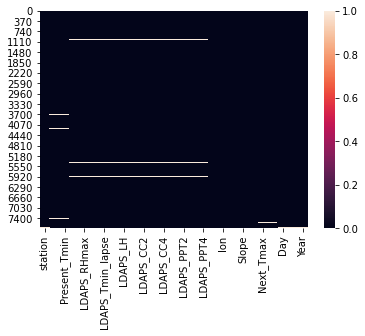

In [83]:
#Missing value checking using heatmap
sns.heatmap(df.isnull()) 

We can see that white lines are present in the heatmap which means missing value is there.

In [84]:
df.isnull().sum()   #Checking for number of  null values in the dataset

station              2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Day                  2
Month                2
Year                 2
dtype: int64

We can see summed missing value in each feature and it seemed to be very less.As the missing data is less than 
1 percent per nfeature , it is safe to remove that datafrom the dataset.

In [85]:
df = df.dropna()

In [86]:
df.isna().sum() #validating missing value

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

We can see there is no missing value present now.

In [87]:
df.duplicated().sum()

0

Thus there is no duplicate value.

In [88]:
#lets check the unique values of all the columns using uunique() function 
df.nunique()

station               25
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7585
LDAPS_RHmax         7577
LDAPS_Tmax_lapse    7588
LDAPS_Tmin_lapse    7588
LDAPS_WS            7588
LDAPS_LH            7588
LDAPS_CC1           7485
LDAPS_CC2           7496
LDAPS_CC3           7512
LDAPS_CC4           7438
LDAPS_PPT1          2779
LDAPS_PPT2          2479
LDAPS_PPT3          2326
LDAPS_PPT4          1892
lat                   12
lon                   25
DEM                   25
Slope                 25
Solar radiation     1575
Next_Tmax            181
Next_Tmin            157
Day                   21
Month                 12
Year                   5
dtype: int64

There are no identifier or constant columns.

In [89]:
#Seperating categorical column and numerical clomun:
#list of all the non_object(numeric) columns
non_obj = df.select_dtypes('number').columns.to_list()
#list of all the object(categoric) columns
obj = df.select_dtypes('object').columns.to_list()


In [90]:
non_obj

['station',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin',
 'Day',
 'Month',
 'Year']

# Univariate Analysis

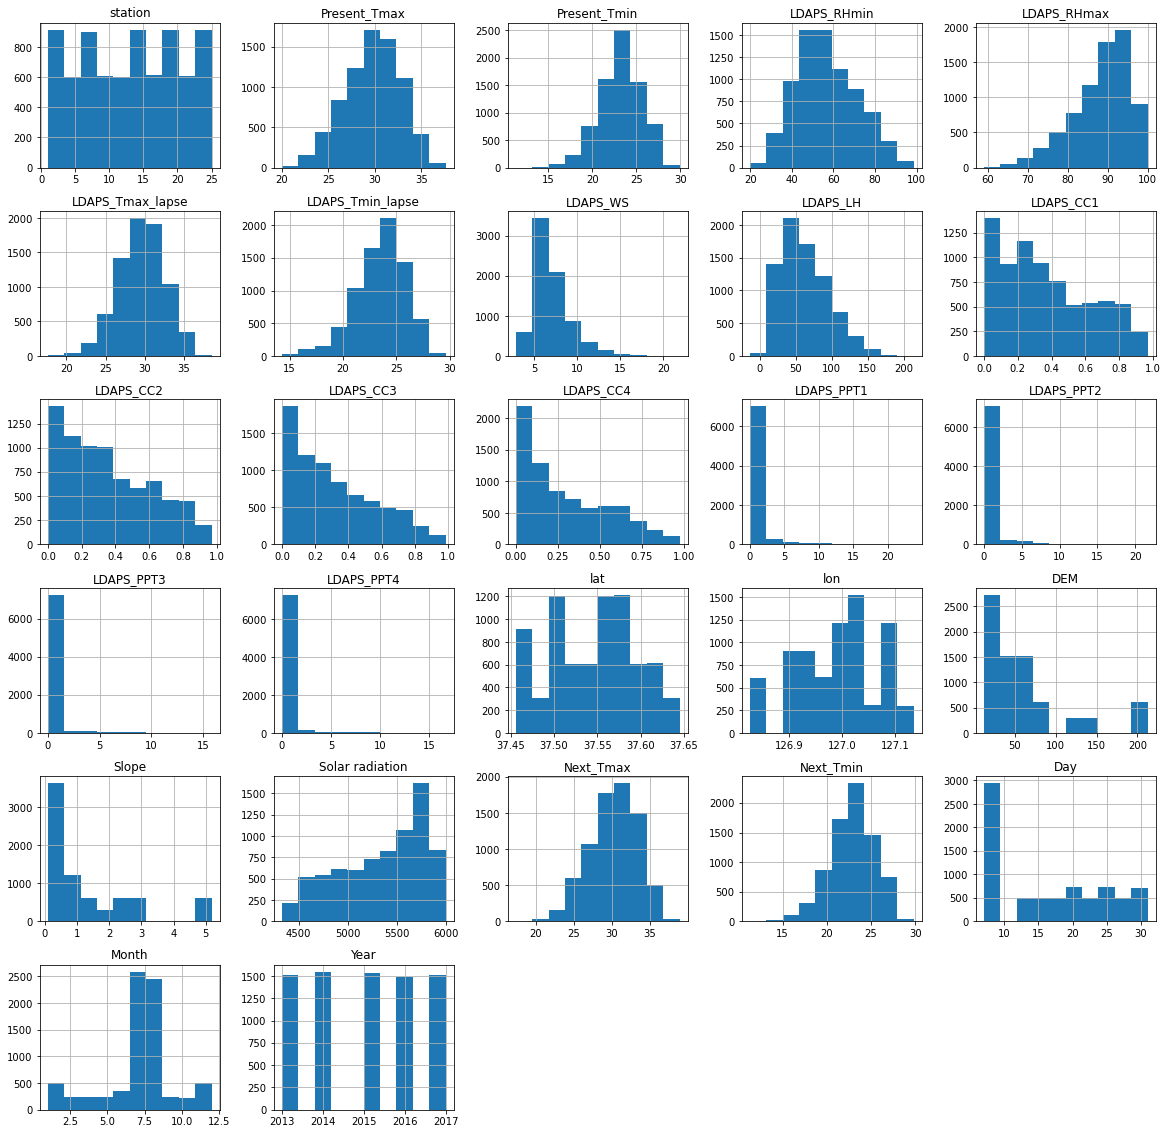

In [91]:
df.hist(figsize=(20,20))
plt.show()

Using the above histogram ,we see that most of the columns are skewed and not normally distributed

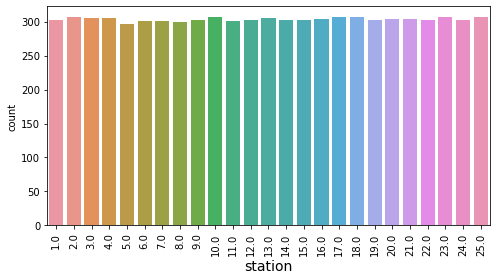

23.0    307
18.0    307
10.0    307
17.0    307
25.0    307
2.0     307
3.0     306
4.0     306
13.0    305
20.0    304
16.0    304
21.0    304
14.0    303
1.0     303
15.0    302
12.0    302
24.0    302
22.0    302
19.0    302
9.0     302
11.0    301
6.0     301
7.0     301
8.0     300
5.0     296
Name: station, dtype: int64

In [92]:
plt.figure(figsize=(7,4))
sns.countplot(x='station' , data=df)
plt.xlabel('station', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df['station'].value_counts()

Thus we see that count plot for station shows equal data coverage records for all its disntint values

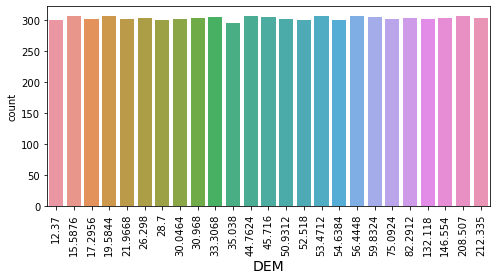

15.5876     307
56.4448     307
19.5844     307
44.7624     307
53.4712     307
208.5070    307
45.7160     306
33.3068     306
59.8324     305
146.5540    304
26.2980     304
82.2912     304
30.9680     303
212.3350    303
17.2956     302
30.0464     302
132.1180    302
50.9312     302
75.0924     302
21.9668     302
54.6384     301
12.3700     301
28.7000     301
52.5180     300
35.0380     296
Name: DEM, dtype: int64

In [93]:
plt.figure(figsize=(7,4))
sns.countplot(x='DEM' , data=df)
plt.xlabel('DEM', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df['DEM'].value_counts()

The elevation (DEM) coevring from 12.37 to 212.335 is almost equal counts.

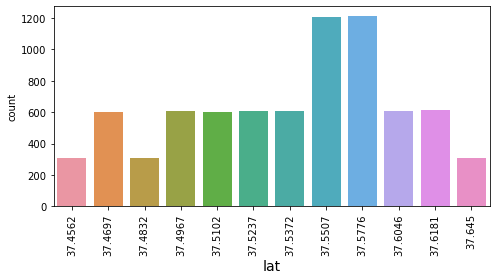

37.5776    1214
37.5507    1204
37.6181     611
37.6046     610
37.5237     609
37.5372     608
37.4967     605
37.4697     604
37.5102     603
37.4562     307
37.4832     307
37.6450     306
Name: lat, dtype: int64

In [94]:
plt.figure(figsize=(7,4))
sns.countplot(x='lat' , data=df)
plt.xlabel('lat', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df['lat'].value_counts()

Here we see latitude co-ordinates of location 37.5507 and 37.5776 are showing high records.For converting the latitude to location of city,
we need to install reverse geocoding and find the same.

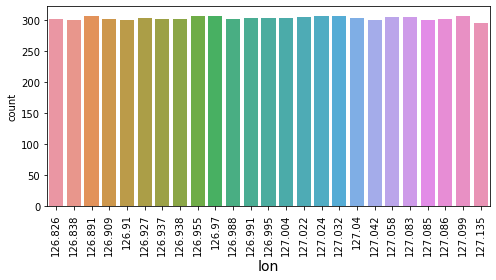

126.970    307
127.099    307
126.955    307
127.024    307
126.891    307
127.032    307
127.022    306
127.058    306
127.083    305
127.040    304
126.995    304
127.004    304
126.927    303
126.991    303
126.826    302
126.937    302
126.938    302
126.988    302
126.909    302
127.086    302
127.085    301
126.838    301
127.042    301
126.910    300
127.135    296
Name: lon, dtype: int64

In [95]:
plt.figure(figsize=(7,4))
sns.countplot(x='lon' , data=df)
plt.xlabel('lon', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df['lon'].value_counts()

Here we see longitudes co-ordinates for all the locations are almost equal records.For converting the latitude to
location of city, we need to install reverse geocoding and find the same.

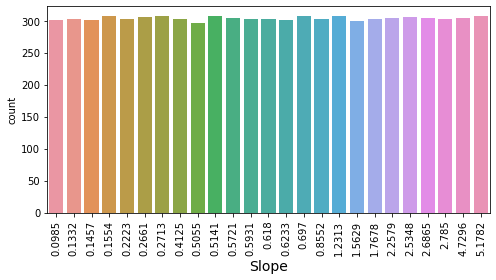

0.5141    307
0.6970    307
1.2313    307
0.2713    307
5.1782    307
0.1554    307
0.2661    306
2.5348    306
2.6865    305
2.2579    304
0.5721    304
4.7296    304
0.6180    303
2.7850    303
0.8552    302
0.4125    302
0.1332    302
1.7678    302
0.2223    302
0.5931    302
0.0985    301
0.1457    301
0.6233    301
1.5629    300
0.5055    296
Name: Slope, dtype: int64

In [96]:
plt.figure(figsize=(7,4))
sns.countplot(x='Slope' , data=df)
plt.xlabel('Slope', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df['Slope'].value_counts()

Here we see slope showing equal data records.

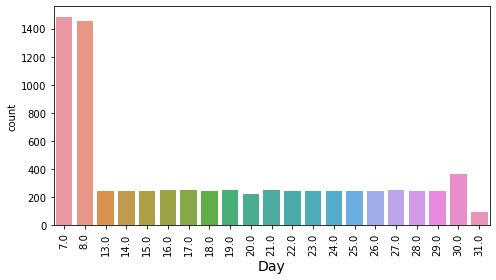

7.0     1484
8.0     1455
30.0     366
19.0     250
27.0     250
21.0     249
16.0     249
17.0     249
15.0     248
28.0     248
29.0     248
22.0     248
26.0     247
14.0     247
18.0     246
13.0     245
25.0     245
23.0     245
24.0     245
20.0     225
31.0      99
Name: Day, dtype: int64

In [97]:
plt.figure(figsize=(7,4))
sns.countplot(x='Day' , data=df)
plt.xlabel('Day', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df['Day'].value_counts()

Thus we see on day 7 and 8 showing hihgest number of records.

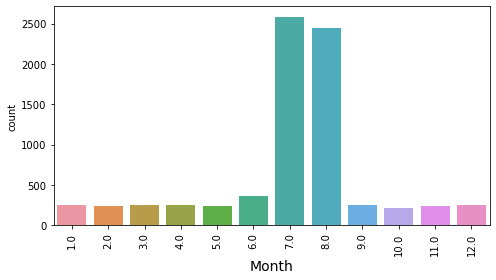

7.0     2584
8.0     2446
6.0      360
1.0      249
4.0      248
9.0      247
12.0     247
3.0      247
5.0      246
2.0      246
11.0     246
10.0     222
Name: Month, dtype: int64

In [98]:
plt.figure(figsize=(7,4))
sns.countplot(x='Month' , data=df)
plt.xlabel('Month', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df['Month'].value_counts()

We see month of july and august ,it showing highest records. 

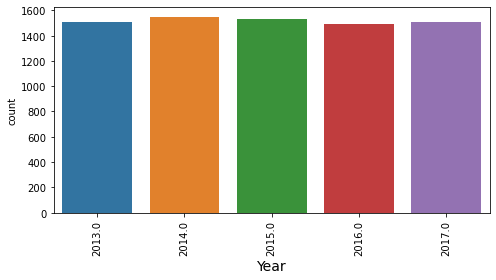

2014.0    1547
2015.0    1533
2013.0    1510
2017.0    1506
2016.0    1492
Name: Year, dtype: int64

In [99]:
plt.figure(figsize=(7,4))
sns.countplot(x='Year' , data=df)
plt.xlabel('Year', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
df['Year'].value_counts()

Thus we see from yearwise records,the counts are almost equal.

# Bivariate Analysis\Multivariate

Plotting Between cloud cover vs precipation
Cloud cover:Cloud cover (also known as cloudiness, cloudage, or cloud amount) refers to the fraction of the 
sky obscured by clouds when observed from a particular location.The cloud cover is correlated to the sunshine
duration as the least cloudy locales are the sunniest ones while the cloudiest areas are the least sunny places.
The type and amount of clouds that commonly form over a region impact theprecipitation conditions.
Cloud cover may also influence temperatures at the surface of the planet.

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='LDAPS_CC4'>

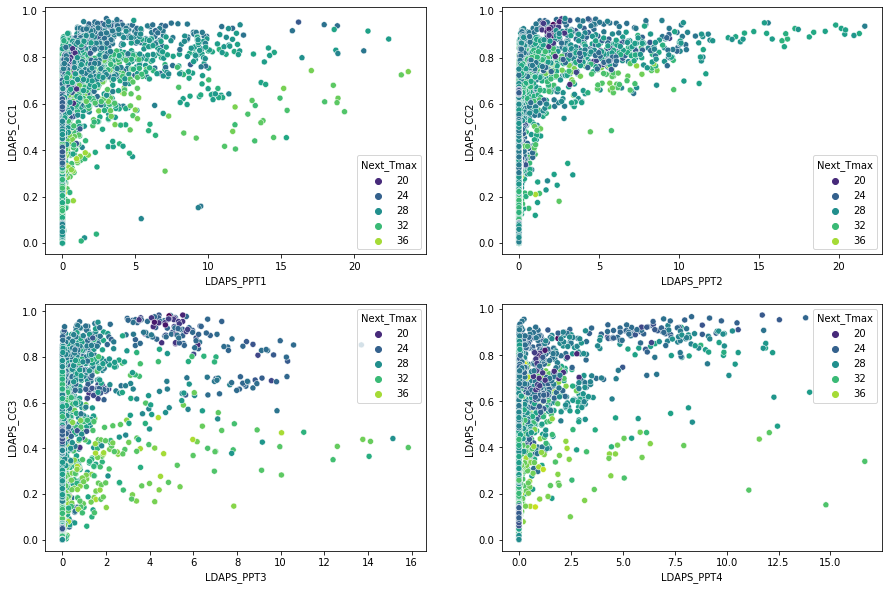

In [100]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(x='LDAPS_PPT1',y='LDAPS_CC1',hue='Next_Tmax',data=df,palette="viridis")

plt.subplot(2,2,2)
sns.scatterplot(x='LDAPS_PPT2',y='LDAPS_CC2',hue='Next_Tmax',data=df,palette="viridis")

plt.subplot(2,2,3)
sns.scatterplot(x='LDAPS_PPT3',y='LDAPS_CC3',hue='Next_Tmax',data=df,palette="viridis")

plt.subplot(2,2,4)
sns.scatterplot(x='LDAPS_PPT4',y='LDAPS_CC4',hue='Next_Tmax',data=df,palette="viridis")

We observe that in the 1st split of cloud cover and precipitaion, precipitation increases after a value of cloud cover crosses
0.4, in the 2nd split precipitation increases after a value of cloud cover crosses 0.5 but in the 3rd and 4th split declood cover has decreased.
When there cloud cover and precipitation both have low value,Tmax is high and vice versa.We can also see some abnormal data 
which are away from concentrated region indicating that presence of outliers.

<AxesSubplot:xlabel='LDAPS_PPT4', ylabel='LDAPS_CC4'>

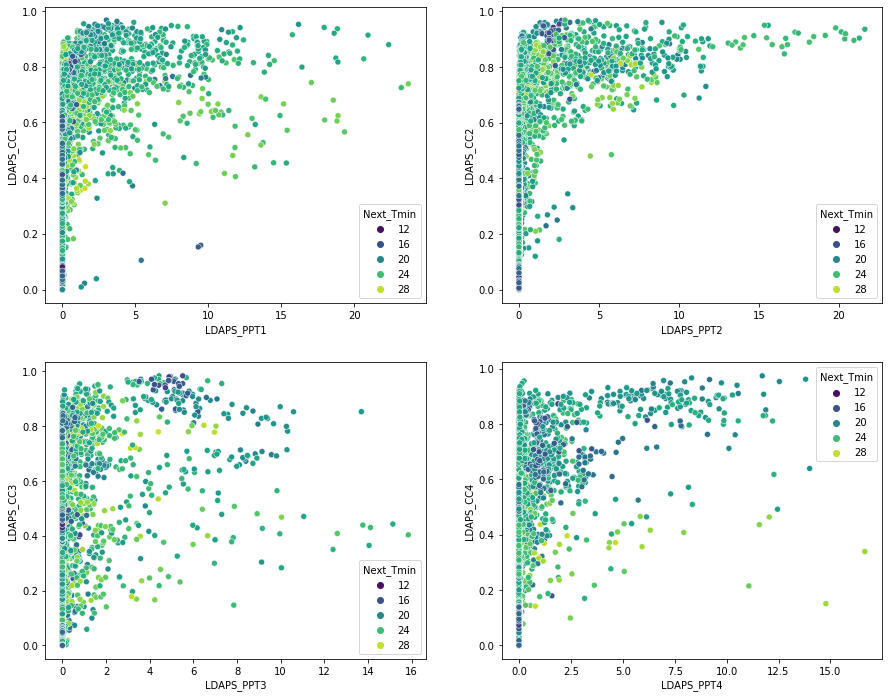

In [101]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
sns.scatterplot(x='LDAPS_PPT1',y='LDAPS_CC1',hue='Next_Tmin',data=df,palette="viridis")

plt.subplot(2,2,2)
sns.scatterplot(x='LDAPS_PPT2',y='LDAPS_CC2',hue='Next_Tmin',data=df,palette="viridis")

plt.subplot(2,2,3)
sns.scatterplot(x='LDAPS_PPT3',y='LDAPS_CC3',hue='Next_Tmin',data=df,palette="viridis")

plt.subplot(2,2,4)
sns.scatterplot(x='LDAPS_PPT4',y='LDAPS_CC4',hue='Next_Tmin',data=df,palette="viridis")

We observe that in the 1st split of cloud cover and precipitaion, precipitation increases after a value of cloud cover crosses
0.4, in the 2nd split precipitation increases after a value of cloud cover crosses 0.5 but in the 3rd and 4th split declood cover has decreased.
When there cloud cover and precipitation both have low value,Tmin is high and vice versa.We can also see some abnormal data 
which are away from concentrated region indicating that presence of outliers.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='LDAPS_Tmin_lapse'>

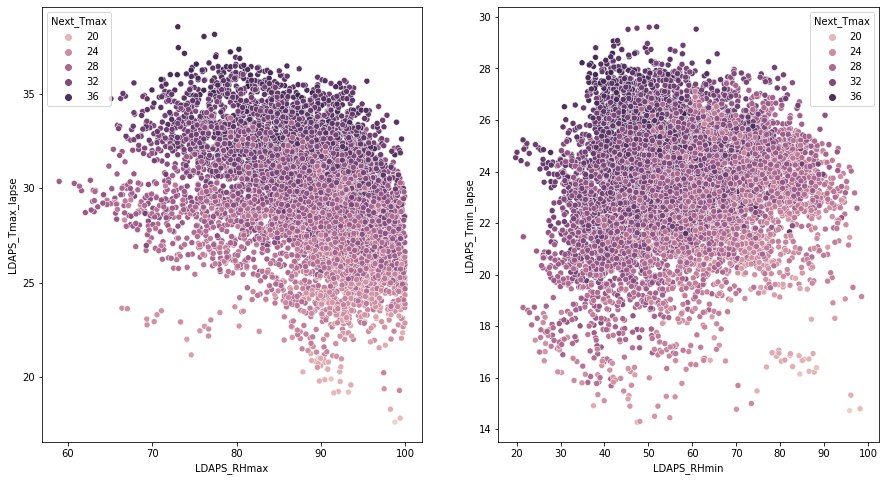

In [102]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.scatterplot(x='LDAPS_RHmax',y='LDAPS_Tmax_lapse',hue='Next_Tmax',data=df)

plt.subplot(1,2,2)
sns.scatterplot(x='LDAPS_RHmin',y='LDAPS_Tmin_lapse',hue='Next_Tmax',data=df)

Thus we observe that As RHmax increases, Tmax lapse rate(maximum air temp.) decreases and Next day Tmax  seem to decrease which shows its inversely 
relationship between temperature and humidity while as Rhmin increases Tmin lapse rate(min. air temp.) also seem to increase but Next dat Tmax decreases.
This can be interpreted as If temperature increases it will lead to a decrease in relative humidity, thus the air will become
drier whereas when temperature decreases, the air will become wet means the relative humidity will increase.

<AxesSubplot:xlabel='LDAPS_RHmin', ylabel='LDAPS_Tmin_lapse'>

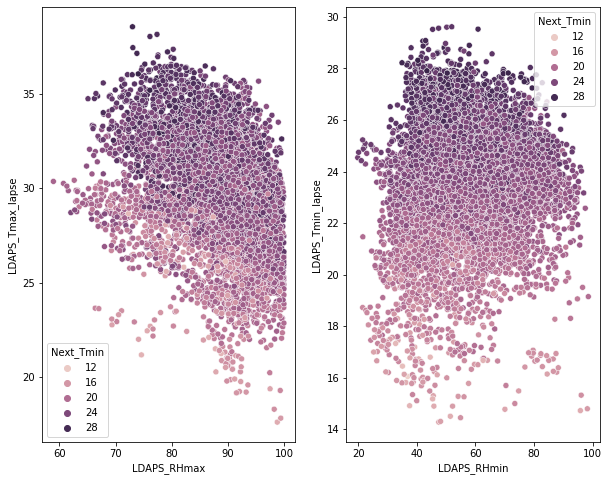

In [103]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
sns.scatterplot(x='LDAPS_RHmax',y='LDAPS_Tmax_lapse',hue='Next_Tmin',data=df)

plt.subplot(1,2,2)
sns.scatterplot(x='LDAPS_RHmin',y='LDAPS_Tmin_lapse',hue='Next_Tmin',data=df)

When RHmax increases , Tmax lapse rate decreases then Next day Tmin seem to decrease while when Rhmin increases 
Tmin lapse rate  seem to increase but Next dat Tmin decreases.

<AxesSubplot:xlabel='lat', ylabel='Next_Tmin'>

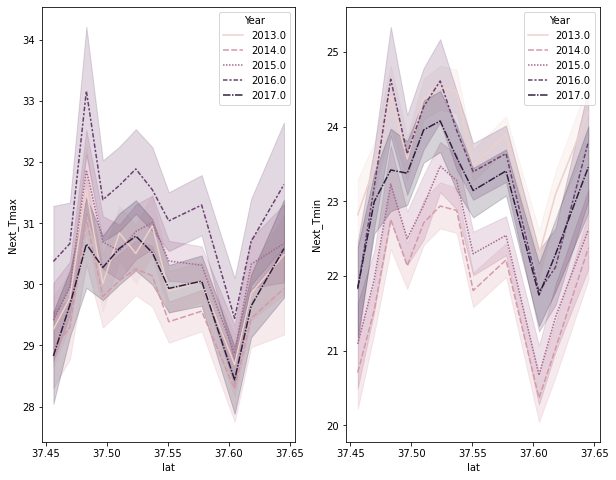

In [104]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
sns.lineplot(data=df, x="lat", y="Next_Tmax", hue="Year", style="Year")

plt.subplot(1,2,2)
sns.lineplot(data=df, x="lat", y="Next_Tmin", hue="Year", style="Year")

Tmax:Thus During the year 2016 ,the peak was highest, and location of the lat coordinate is around 37.5 which shows highest Tmax of33.5Thus we see every year from 2013 to 2017,around the same latitude ,the Tmax is high randing from 32 to 33.5.Lowest is in the latitude cordinate of 37.60 of temperature 28.

Tmix:During the year 2016,Tmin was around 24.5 with high peak of latitude coordinates of 37.47 approx and 
lowest Tmin was around 20 at coordinate 27.60. 
Thus as a whole,we can see Tmax and Tmin are fluctuating every year.   

<AxesSubplot:xlabel='lon', ylabel='Next_Tmin'>

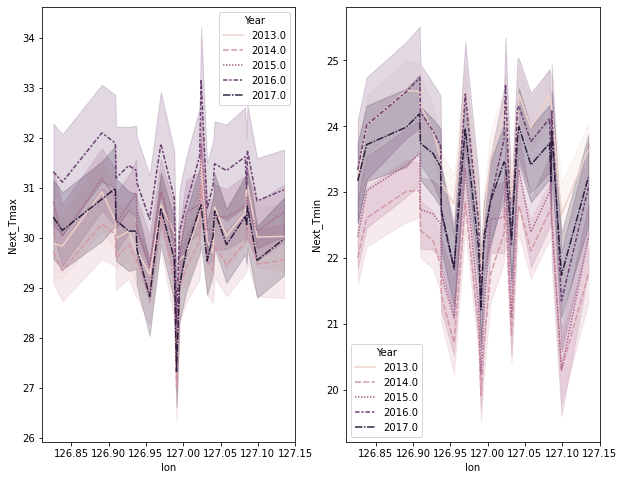

In [105]:
plt.figure(figsize=(10,8))

plt.subplot(1,2,1)
sns.lineplot(data=df, x="lon", y="Next_Tmax", hue="Year", style="Year")

plt.subplot(1,2,2)
sns.lineplot(data=df, x="lon", y="Next_Tmin", hue="Year", style="Year")

Thus Tmax is higher around 33 at longitude coordinate of 127.05 during year 2017 .
Tmin is lower around 21 at longitude corordinate of 127.00 during year 2017.
Thus as a whole,we can see Tmax and Tmin are fluctuating every year.   

<AxesSubplot:xlabel='station', ylabel='Next_Tmax'>

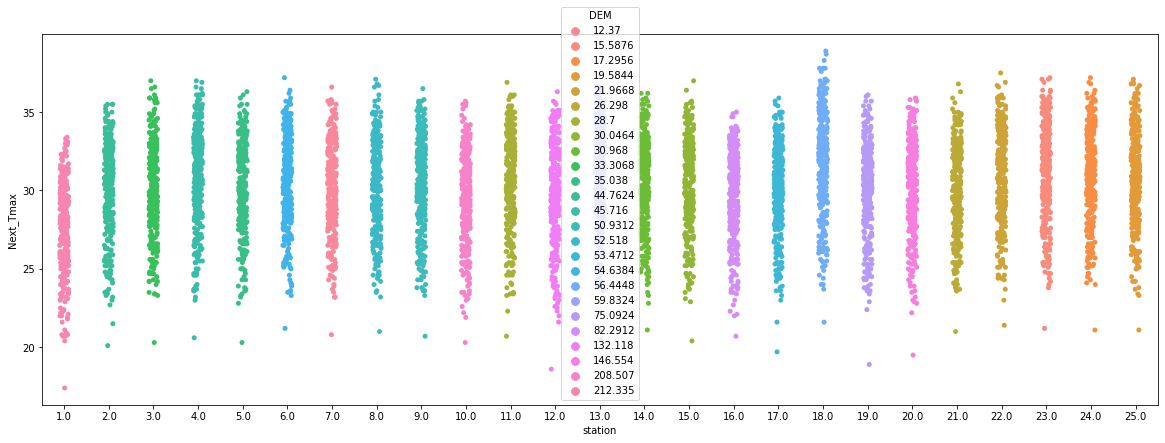

In [106]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.stripplot(x='station',y='Next_Tmax',hue='DEM',data=df)

Highest tmax can be seen at station 18 which is having an elevation of 56.44.The lowest elevation is at station 10 having max 
air tempeperature of 33 approx. which indicates that elevation is not the only criteria to decide the temperature.

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

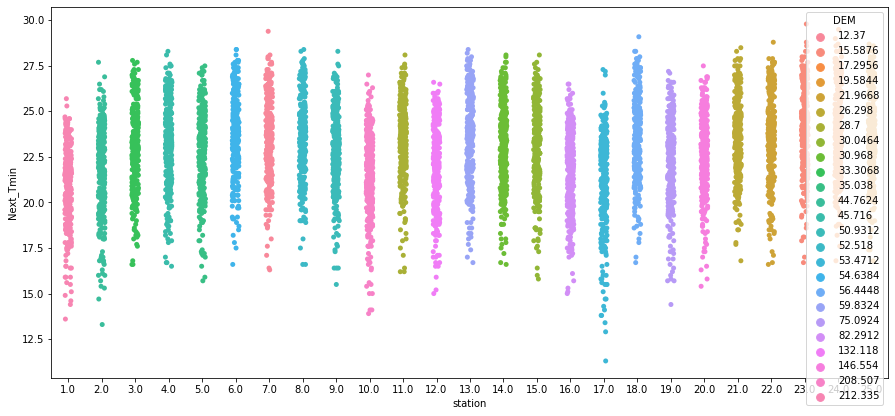

In [113]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.stripplot(x='station',y='Next_Tmin',hue='DEM',data=df)

Thus we see Min temperature has gone to 12.5 at station 17 having elevation of 53.47.Other statition shows neat
constant temperature.Thus we see elevation is not only the one deciding criteria for temperature.

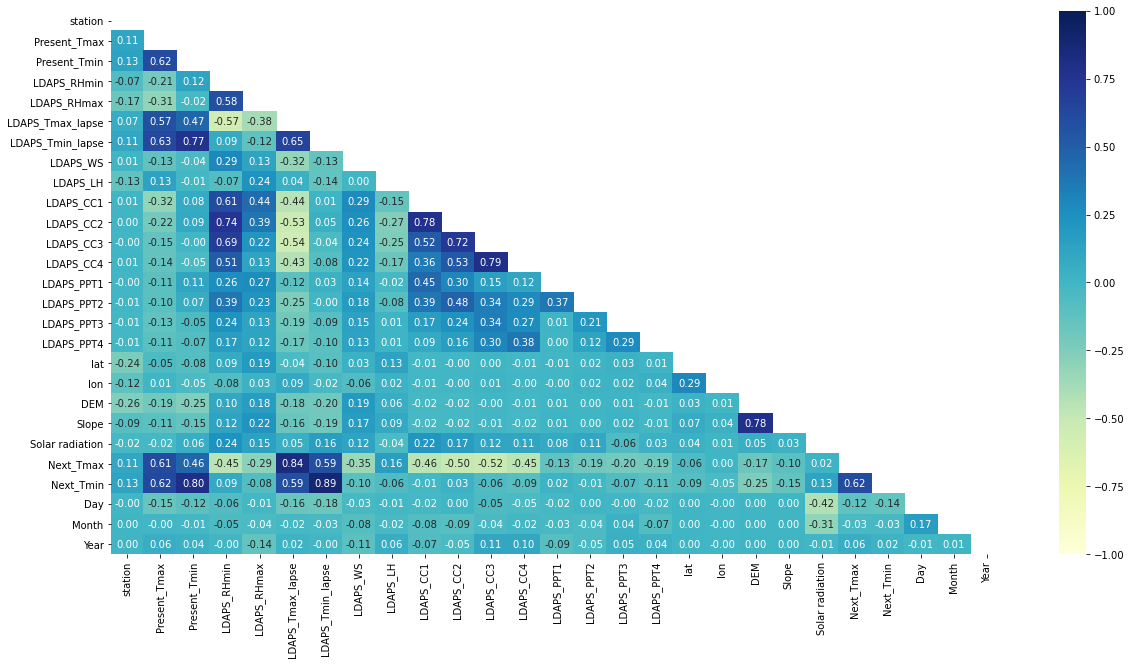

In [114]:
# For continous columns only 
mask = np.triu(np.ones_like(df[non_obj].corr(), dtype=bool)) 
fig = plt.subplots(figsize=(20, 10))
sns.heatmap(df[non_obj].corr(), annot=True,fmt='.2f',mask=mask, 
            vmin=-1,vmax= +1,cmap="YlGnBu")
plt.show()

Thus we can see there is high positive correlation between present_Tmax , present_Tmin with  Next_Tmin and Next_Tmax
There is also strong correlation between LDAPA_Tmax_lapse and LADPS_Tmin_laspe with Next_Tmin & Next_Tmax. 
There is also strong correlation between LDAPA_Tmax_lapse and LADPS_Tmin_laspe with present_Tmin & present_Tmax. We can see that 
there is a negative correlation of Tmax with precipitation,relative humidity and cloud cover splits. 

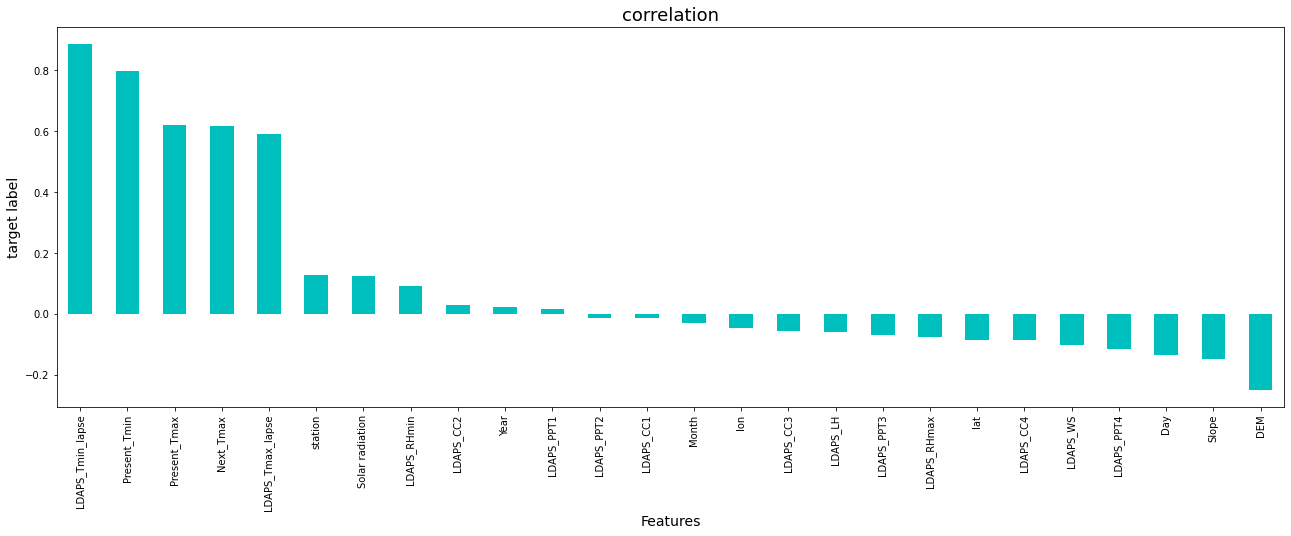

In [115]:
#bar plot showing correlation bw target and features when using classification problem as primary_fuel as target
plt.figure(figsize=(22,7))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('target label',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

As Next_Tmin bieng the target variable,showing positive correlation with LDAPS_Tmin_lapse,Present_Tmin,Present_Tmax,Next_Tmax,
LDAPS_Tmax_lapse the most and DEM being most negatively correlated.

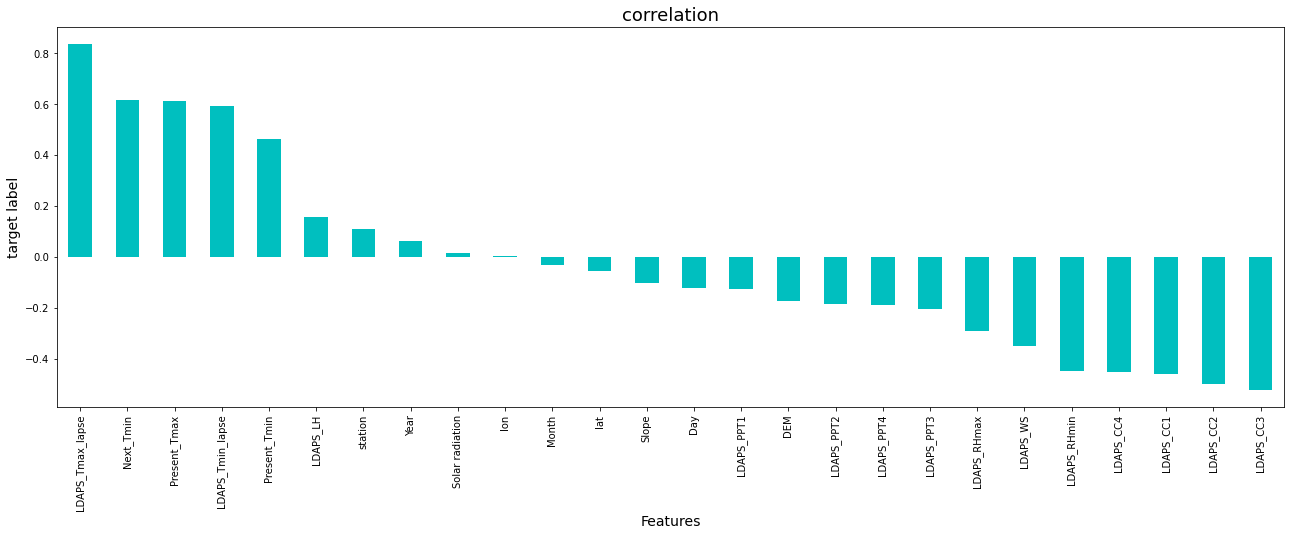

In [116]:
#bar plot showing correlation bw target and features when using classification problem as primary_fuel as target
plt.figure(figsize=(22,7))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('target label',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

As Next_Tmax bieng the target variable,showing positive correlation with LDAPS_Tmax_lapse,Next_Tmin,Present_Tmin,Present_Tmax,
Next_Tmax, LDAPS_Tmin_lapse the most and cloud cover splits,relative humidity being negtaively correlated.

# checking data distribution along all columns

In [117]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Day                 0.245563
Month              -0.703092
Year                0.013575
dtype: float64

Considering skewness threshold range +/-0.5 value,we can see many features showing skewness and beyond the accepatble range

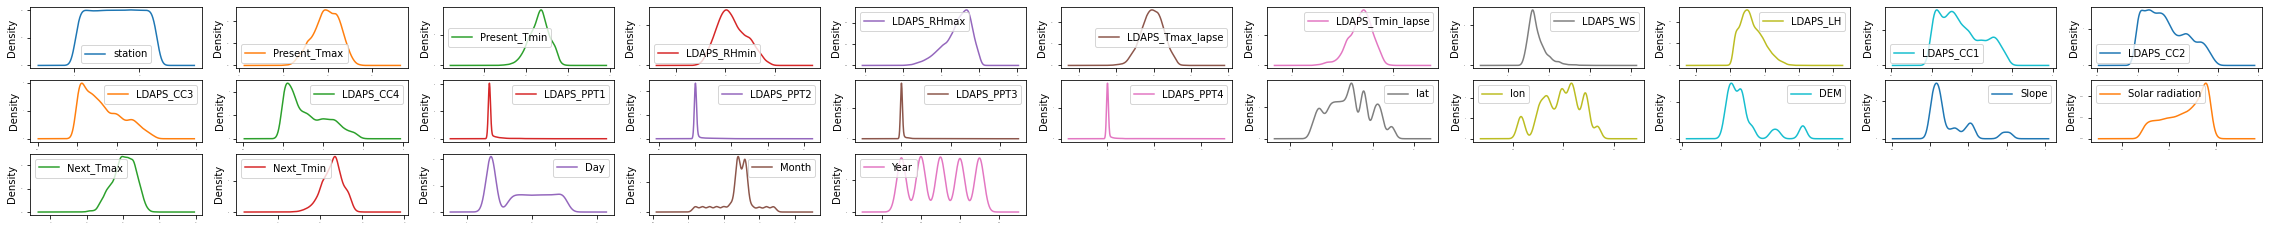

In [118]:
df.plot(kind='density',subplots=True,layout=(15,11),sharex=False,fontsize=1,figsize=(40,20))
plt.show()

Thus we see skewness is presnt in miultiple column.

# Checking Outliers

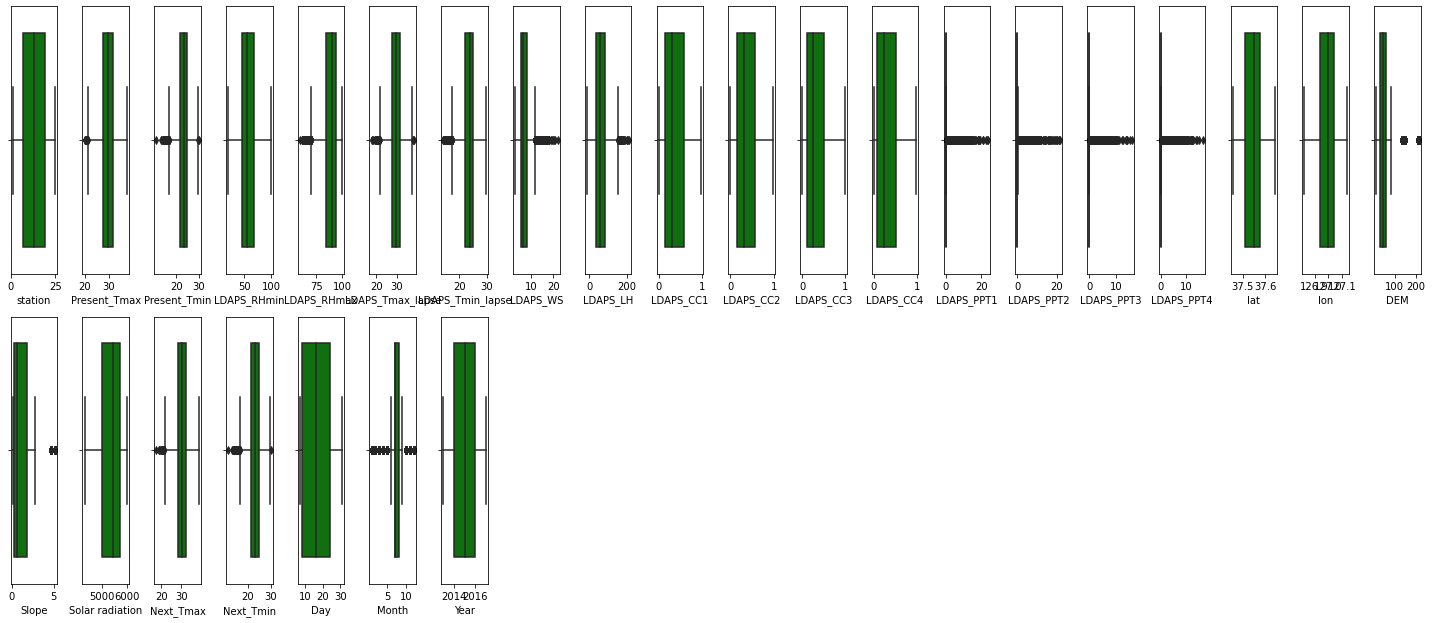

In [119]:
#checking ouliers by visual representation
import matplotlib.pyplot as plt
collist=df.columns.values
ncol=20
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='h')
    plt.tight_layout()

Oultiers are present in most of the columns,though the graph is not clear.

In [120]:
# import pylab
def univariateAnalysis_numeric(non_obj,nbins):
    plt.figure(figsize=(5,5))
    print("----------------------------------------------------------------------------")
    ax = df.boxplot(non_obj,patch_artist=True)
    plt.title("BoxPlot of " + non_obj)
    plt.xlabel(non_obj)
    plt.ylabel('Values')
    plt.show()

----------------------------------------------------------------------------


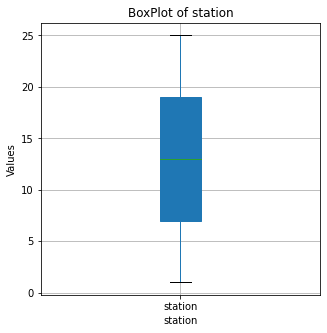

----------------------------------------------------------------------------


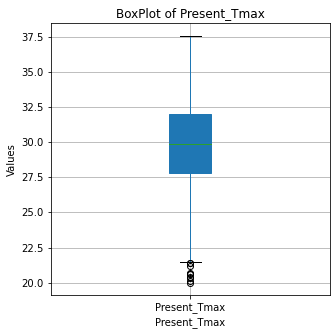

----------------------------------------------------------------------------


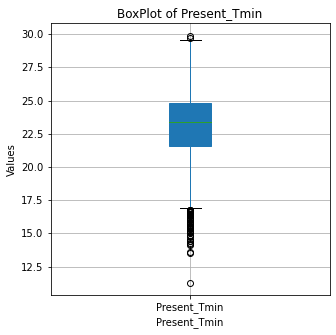

----------------------------------------------------------------------------


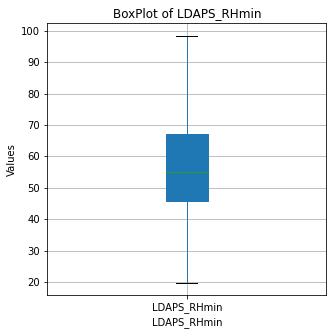

----------------------------------------------------------------------------


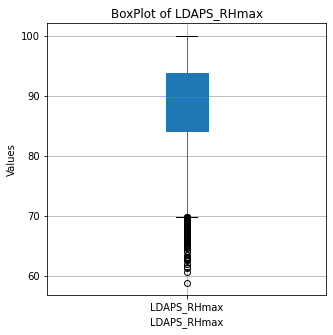

----------------------------------------------------------------------------


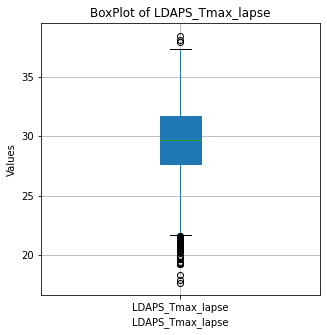

----------------------------------------------------------------------------


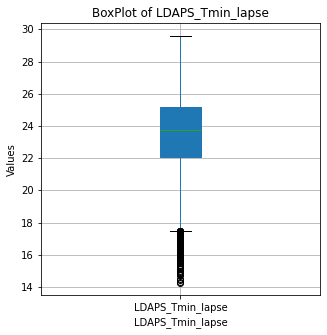

----------------------------------------------------------------------------


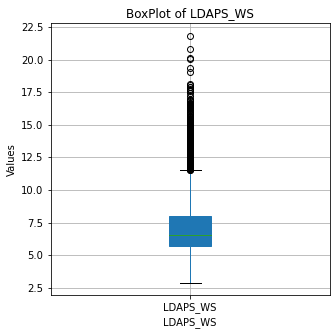

----------------------------------------------------------------------------


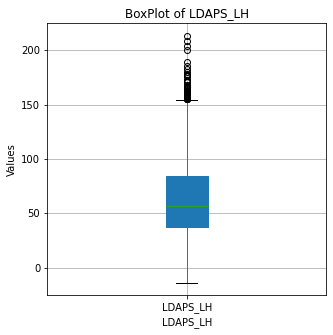

----------------------------------------------------------------------------


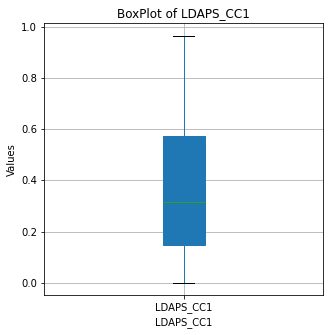

----------------------------------------------------------------------------


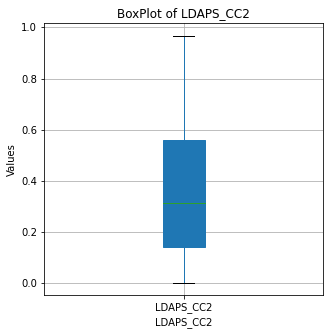

----------------------------------------------------------------------------


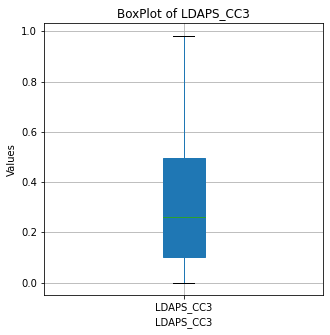

----------------------------------------------------------------------------


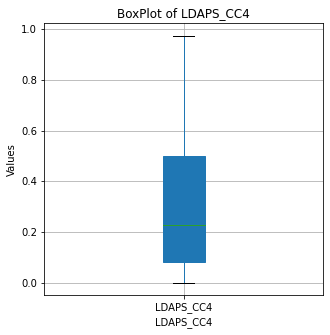

----------------------------------------------------------------------------


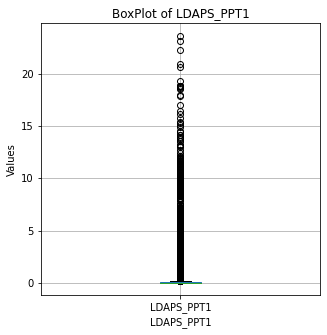

----------------------------------------------------------------------------


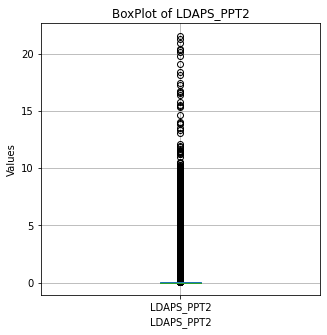

----------------------------------------------------------------------------


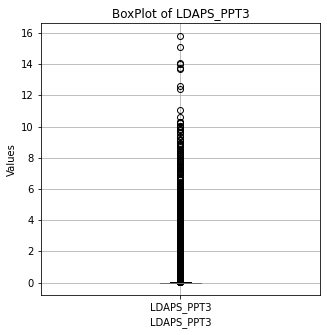

----------------------------------------------------------------------------


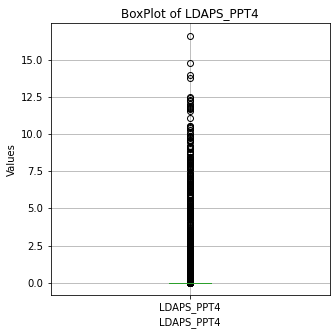

----------------------------------------------------------------------------


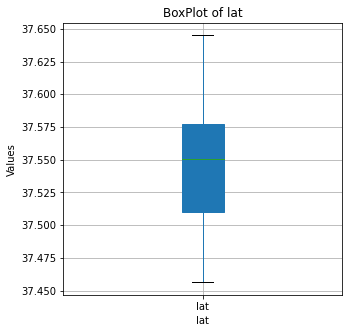

----------------------------------------------------------------------------


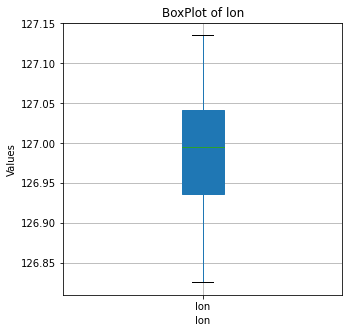

----------------------------------------------------------------------------


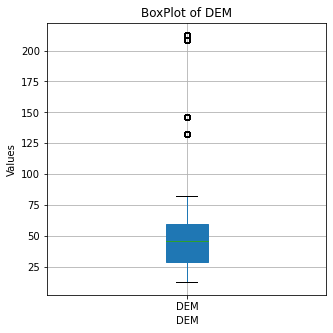

----------------------------------------------------------------------------


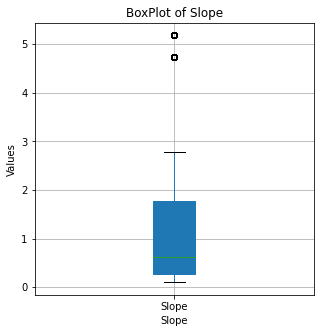

----------------------------------------------------------------------------


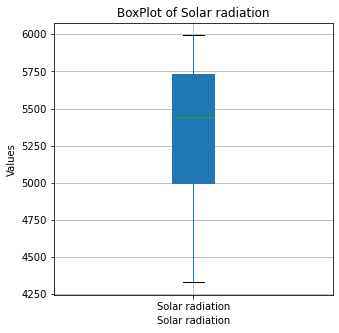

----------------------------------------------------------------------------


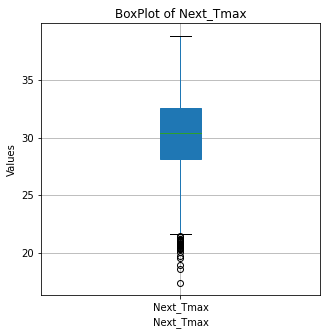

----------------------------------------------------------------------------


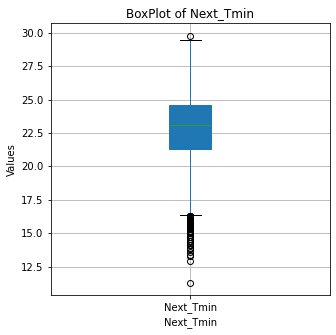

----------------------------------------------------------------------------


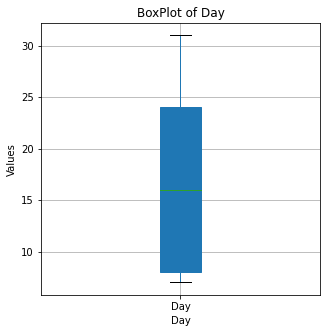

----------------------------------------------------------------------------


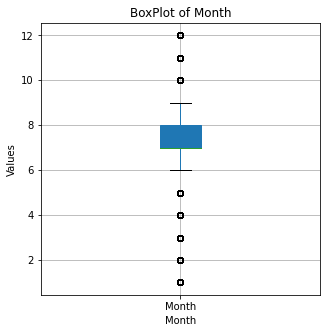

----------------------------------------------------------------------------


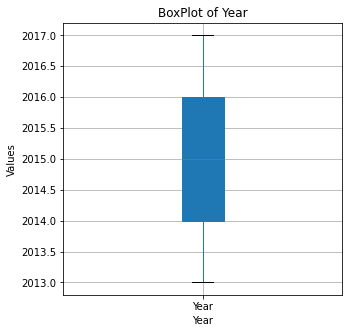

In [121]:
for x in non_obj:
    univariateAnalysis_numeric(x, 50);

From above we can clear see the Oultiers in most of the columns.

# Removal of outlier using Z score method

In [122]:
z = np.abs(zscore(df))
threshold = 3
dfnew = df[(z<3).all(axis = 1)]

print ("Dataframe Shape before removing outliers: ", df.shape)
print ("Dataframe Shape after removing outliers: ", dfnew.shape)
print ("Percentage of data loss after outlier removal: ", (df.shape[0]-dfnew.shape[0])/df.shape[0]*100)

df=dfnew.copy() # reassigning to our original dataframe name

Dataframe Shape before removing outliers:  (7588, 27)
Dataframe Shape after removing outliers:  (6739, 27)
Percentage of data loss after outlier removal:  11.188719030047443


We can accept the data loss considering the fact that the dataset is large. 

# Splitting into x and y column before removing skewness

In [123]:
x=df.copy()
x.drop(['Next_Tmax','Next_Tmin'],axis=1,inplace=True)
ymax=df['Next_Tmax']
ymin=df['Next_Tmin']

In [124]:
#removing skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-1.86896379e+00, -4.72363165e-01, -8.34287511e-01, ...,
         1.42556435e+00, -5.75809956e-01, -2.55351296e-15],
       [-1.65760814e+00,  6.71403102e-01, -7.52246702e-01, ...,
         1.42556435e+00, -5.75809956e-01, -2.55351296e-15],
       [-1.46443720e+00,  5.58754980e-01, -3.06596599e-02, ...,
         1.42556435e+00, -5.75809956e-01, -2.55351296e-15],
       ...,
       [ 1.30773863e+00, -2.11555083e+00, -2.45054303e+00, ...,
         1.42556435e+00,  3.64101883e-01,  2.49800181e-15],
       [ 1.42316008e+00, -2.11555083e+00, -2.24214307e+00, ...,
         1.42556435e+00,  3.64101883e-01,  2.49800181e-15],
       [ 1.53736840e+00, -2.14261405e+00, -2.34704556e+00, ...,
         1.42556435e+00,  3.64101883e-01,  2.49800181e-15]])

In [125]:
#Scaling the dataset using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
 
# create data
data = x 
# scale features
scaler = MinMaxScaler()
model=scaler.fit(x)
scaled_data=model.transform(data)
 
# print scaled features
print(scaled_data)

[[0.         0.38453494 0.32739713 ... 0.97516131 0.34768222 0.        ]
 [0.06204787 0.58572896 0.34116405 ... 0.97516131 0.34768222 0.        ]
 [0.11875723 0.56591361 0.46225054 ... 0.97516131 0.34768222 0.        ]
 ...
 [0.93258738 0.09549028 0.05618007 ... 0.97516131 0.54072592 1.        ]
 [0.96647176 0.09549028 0.0911508  ... 0.97516131 0.54072592 1.        ]
 [1.         0.09072973 0.07354755 ... 0.97516131 0.54072592 1.        ]]


# Finding the best random state for Regression Models for Ymax :Our First Target Variable:ymin

In [185]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, ymin, test_size=0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.8374558168948936 on Random State 826


# Base Model:Linear Regression

Base Model:Linear Regression

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, ymax, test_size=0.33, random_state=833) #taking the best random state from above

In [128]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([ 1.61662428e-01,  5.88076582e-01,  6.19721321e-02,  4.06717151e-01,
       -3.60312567e-02,  1.74176020e+00,  5.04583831e-02, -2.48270426e-01,
        2.32827758e-01,  3.83304531e-02, -1.76439991e-01, -1.76109951e-01,
       -4.23517379e-01, -2.30122728e-01, -1.53306645e-01, -6.61594638e-02,
        1.01177538e-01, -1.48678992e+11, -1.28421201e-01, -3.26666054e-02,
        6.92287562e-03,  7.17048685e-02,  9.04368797e-02, -8.59723251e-02,
        5.20465240e+13])

In [129]:
lr.intercept_ 

30.520647585338324

In [130]:
#training the model
lr.score(x_train,y_train)


0.7539272974525207

In [131]:
#predicting train
pred_train=lr.predict(x_train)
pred_train

array([29.17578457, 34.59159525, 30.14684908, ..., 36.54855336,
       30.62106833, 33.76318377])

In [132]:
#predicting y_test
pred_test=lr.predict(x_test)
pred_test

array([29.79668257, 32.3582342 , 24.85580041, ..., 34.70788876,
       27.92792407, 26.94400116])

# cross_validation of the model

In [133]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,15):
    cv_score=cross_val_score(lr,x,ymax,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold :",j)
    print("The CV score is :",cv_mean)
    print("The accuracy score for training :",Train_accuracy)
    print("The accuracy score for testing :",Test_accuracy)
    print("\n")

At cross fold : 2
The CV score is : 0.5470476526403665
The accuracy score for training : 0.7539272974525207
The accuracy score for testing : 0.7843423046876554


At cross fold : 3
The CV score is : 0.644257349703847
The accuracy score for training : 0.7539272974525207
The accuracy score for testing : 0.7843423046876554


At cross fold : 4
The CV score is : 0.66575797363849
The accuracy score for training : 0.7539272974525207
The accuracy score for testing : 0.7843423046876554


At cross fold : 5
The CV score is : 0.6592532945476526
The accuracy score for training : 0.7539272974525207
The accuracy score for testing : 0.7843423046876554


At cross fold : 6
The CV score is : 0.6669771396669706
The accuracy score for training : 0.7539272974525207
The accuracy score for testing : 0.7843423046876554


At cross fold : 7
The CV score is : 0.6704193003003908
The accuracy score for training : 0.7539272974525207
The accuracy score for testing : 0.7843423046876554


At cross fold : 8
The CV score 

Thus we see that at cross validation =6 ,the cv score is 67% where the accuarcy score for testing and training is very close.so we
will choose cv=6

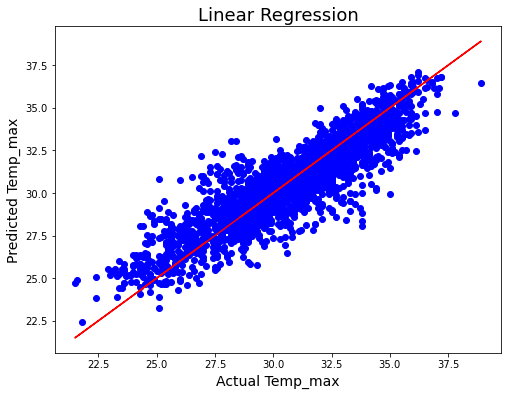

In [134]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Temp_max",fontsize=14)
plt.ylabel("Predicted Temp_max",fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

Thus we can see the best fit line covering the datapoints ,we can improve more by regularization and hyperparameter technique. 
There are some datapoints far away from best fit line,which can increase the mse error so we need to regularise and
improve the r2_score.

In [135]:
#testing the model
lr.score(x_test,y_test)

0.7843423046876554

In [136]:
print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
print("Mean squared error :",mean_squared_error(y_test,pred_test))
print("Root mean error :",np.sqrt(mean_squared_error(y_test,pred_test)))
print("R2_Score",r2_score(y_test,pred_test))

Mean absolute error : 1.0398245200456877
Mean squared error : 1.8639494189810089
Root mean error : 1.3652653291507144
R2_Score 0.7843423046876554


Thus we see the accuracy score of linear regression is 78.43% with root mean square is 1.36.

# REGULARIZATION (LASSO AND RIDGE)

In [137]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score

In [138]:
rdg=Ridge(alpha=0.001,random_state=833)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.7530595068618285

In [139]:
#Lasso model training
ls=Lasso(alpha= 0.1, random_state= 833)
ls.fit(x_train,y_train)   
ls_score_training=ls.score(x_train,y_train) 
pred_ls=ls.predict(x_test) 
ls_score_training*100 

73.7593640077298

In [140]:
predict=rdg.predict(x_test)

In [141]:
r2_score(y_test,predict)

0.7837166592436589

Thus the accuracy score using ridge method is 78.37% 

In [142]:
lso=Lasso(alpha=0.0001,random_state=833)
lso.fit(x_train,y_train)
lso.score(x_train,y_train)

0.7530594407771056

In [143]:
predict1=lso.predict(x_test)
predict1

array([29.88962524, 32.35661278, 24.84350995, ..., 34.77766846,
       28.05184996, 26.92681075])

In [144]:
r2_score(y_test,predict1)

0.7837251841202478

Thus the accuracy score using ridge method is 78.37%

The accurcay score for ridge and lasso are almost same.

# Finding the best model

We will be using LinearRegression, SVR, DecisionTreeRegressor ,KNeighborsRegressor ,RandomForestRegressor, GradientBoostingRegressor algorithms for finding out the best model among those

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error 

In [146]:
LR=LinearRegression()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()

In [147]:
models= []
models.append(('Linear Regression',LR))
models.append(('Support Vector Regressor',svr))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))
models.append(('RandomForestRegressor',rfr))
models.append(('GradientBoostingRegressor',gbr))

In [148]:
#Importing required metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [149]:
#Finding the required metrices for all models together using a for loop
Model=[]
score=[]
cvs=[]
rmse=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,ymax,cv=6,scoring='r2').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')

****************************** Linear Regression ***************************


LinearRegression()


accuracy_score:  0.7843423046876554


cross_val_score:  0.6669771396669706


Root Mean Squared Error:  1.3652653291507144



****************************** Support Vector Regressor ***************************


SVR()


accuracy_score:  0.8795952119257406


cross_val_score:  0.64432494148399


Root Mean Squared Error:  1.0201322102478376



****************************** Decision Tree Regressor ***************************


DecisionTreeRegressor()


accuracy_score:  0.7281507986782878


cross_val_score:  0.3916807242817501


Root Mean Squared Error:  1.5328463085891537



****************************** KNeighbors Regressor ***************************


KNeighborsRegressor()


accuracy_score:  0.8709737116592748


cross_val_score:  0.5297788701793856


Root Mean Squared Error:  1.0560237455091324



****************************** RandomForestRegressor ***************************


RandomFo

In [150]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs,'Root_Mean_Squared_error':rmse})
result

,Model,Accuracy_score,Cross_val_score,Root_Mean_Squared_error
0,Linear Regression,78.434230,66.697714,1.365265
1,Support Vector Regressor,87.959521,64.432494,1.020132
2,Decision Tree Regressor,72.815080,39.168072,1.532846
3,KNeighbors Regressor,87.097371,52.977887,1.056024
4,RandomForestRegressor,89.530336,65.990178,0.951264
5,GradientBoostingRegressor,85.528301,68.640352,1.118393


The best model from the above algorithms is Random Forest Regressor,Support Vector Regressor and KNeighbors Regreser are giving  accuracy score of 89.73,87.95 and 87.09 respectively  and cross validation score of 66.11,64.43 and 52.97 respectivly and also we find that random forest has less RMSE score from all.Lesser the RMSE score, the better model we can build. As random forest ahs very good accuracy score with less rmse error ,we will chhoose this model and try to find the best parameters and increase the accuracy score of the model by using Hyperparameter Tuning.

# Hyperparameter Tuning

In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
parameters= {'n_estimators': [100, 150,200],
             'min_samples_split':[2,3,4],
             'min_samples_leaf':[2,3,4],
             'max_depth' : [2,3,3],
}
rfr=RandomForestRegressor(random_state=833)
GCVr=GridSearchCV(rfr,parameters,cv=6,scoring='accuracy')
GCVr.fit(x_train,y_train)
print(GCVr.best_params_)#Printing the best parameters obtained

{'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
nan


In [166]:
rfr=RandomForestRegressor(max_depth=2,min_samples_leaf=2,min_samples_split=2,n_estimators=100)
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
pred_decision=rfr.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('R2 Score',rfs*100)

rfscore=cross_val_score(rfr,x,ymax,cv=6)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100)

R2 Score 66.91606295924349
Cross Val Score: 57.15492357771627


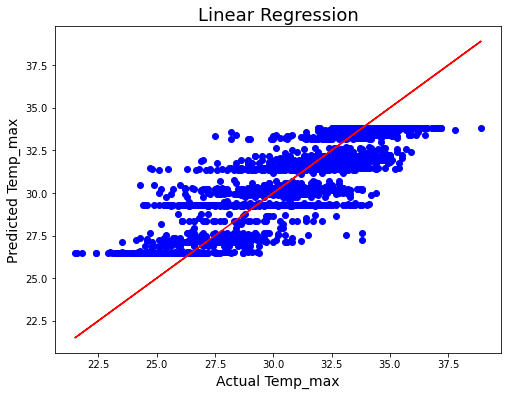

In [170]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_decision,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Temp_max",fontsize=14)
plt.ylabel("Predicted Temp_max",fontsize=14)
plt.title("Random Forest Regression",fontsize=18)
plt.show()

This is the best fit line after hypertuning for random forest regressor. 

# Saving the model :Randon Forest Regressor :Best Model

In [182]:
import pickle
filename='temperature_max.pkl'
pickle.dump(rfr,open(filename,'wb'))

In [183]:
loaded_model=pickle.load(open('temperature_max.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

66.91606295924349


Thus this model gives accuracy of 66% for the predicted resultof ymax which is good .

# Prediction Results

In [184]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142,2143,2144,2145,2146,2147,2148,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199,2200,2201,2202,2203,2204,2205,2206,2207,2208,2209,2210,2211,2212,2213,2214,2215,2216,2217,2218,2219,2220,2221,2222,2223
Predicted,30.184625,32.147543,26.477965,30.374309,32.224783,29.914174,29.247253,33.828742,31.486941,33.629050,31.946730,29.247253,31.779044,31.486941,29.302258,33.383003,26.477965,30.269248,31.486941,29.959128,29.914174,33.805123,31.925146,33.152651,27.144637,29.302258,31.417922,26.477965,31.352453,32.025091,33.828742,29.302258,31.779044,33.805123,32.528031,27.144637,29.914174,27.465524,29.302258,30.269248,30.462543,30.228450,33.828742,29.302258,29.323525,29.978786,27.115695,31.417922,29.302258,31.803473,31.779044,29.302258,27.308231,33.152651,31.417922,29.978786,30.374309,33.828742,31.464085,29.302258,27.115695,32.147543,30.164207,33.152651,31.486941,31.464085,29.302258,29.302258,31.395712,31.417922,31.932679,30.228450,31.486941,29.978786,29.302258,26.477965,27.115695,33.404640,31.779044,30.164207,33.152651,31.417922,33.828742,28.177497,30.228450,27.115695,29.302258,31.417922,29.369203,27.196715,33.828742,29.302258,33.828742,33.359384,31.417922,30.164207,29.302258,29.302258,33.598390,33.598390,29.302258,33.828742,31.486941,31.779044,33.828742,27.115695,30.269248,29.302258,33.828742,29.302258,33.828742,29.959128,32.323737,29.302258,27.144637,28.374904,30.228450,33.828742,29.302258,33.383003,33.383003,31.486941,29.996158,29.302258,31.486941,26.477965,30.228450,32.224783,31.486941,30.184625,31.486941,26.477965,31.932679,29.302258,29.247253,29.302258,26.477965,33.828742,33.245574,29.302258,33.383003,29.247253,31.486941,31.946730,33.314983,33.828742,31.946730,31.946730,33.667443,32.147543,33.359384,33.828742,29.302258,26.881728,29.891395,28.374904,29.302258,30.589802,29.302258,33.152651,29.302258,29.302258,29.914174,26.551303,29.302258,29.302258,31.756995,31.486941,31.486941,31.756995,31.803473,33.269700,32.392469,30.228450,27.196715,31.417922,29.914174,26.477965,28.259561,29.302258,29.996158,26.477965,29.996158,31.946730,28.37

# Finding the best random state for Regression Models for Ymax :Our First Target Variable:Ymin

In [195]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x, ymin, test_size=0.33, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.8374558168948936 on Random State 826


# Base Model:Linear Regression

Creating the training and testing data sets

In [196]:
x_train, x_test, y_train, y_test = train_test_split(x, ymin, test_size=0.33, random_state=826) #taking the best random state from above

In [197]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([-1.62995743e-02,  2.67451668e-01,  4.72305833e-01,  3.31717247e-01,
        1.28390968e-01,  3.71444838e-01,  1.23853052e+00,  1.13583379e-01,
        1.27928694e-02,  3.80626482e-03,  1.15027255e-01,  7.31864447e-03,
       -2.26507132e-03, -9.99555543e-02, -1.70304441e-01, -2.29397334e-02,
       -1.03722487e-01, -1.99807566e+12,  2.74267976e-02, -3.64449013e-01,
        1.78708311e-01,  7.49441796e-02,  1.43890226e-01, -2.35413174e-02,
        5.60728174e+12])

In [198]:
lr.intercept_ 

23.060718893425765

In [199]:
#training the model
lr.score(x_train,y_train)


0.8163508233929906

In [200]:
#predicting train
pred_train=lr.predict(x_train)
pred_train

array([23.52708537, 27.25369457, 23.05269922, ..., 25.1819841 ,
       23.80207462, 24.23520254])

In [201]:
#predicting y_test
pred_test=lr.predict(x_test)
pred_test

array([22.97783875, 22.12568572, 21.09730265, ..., 19.80722584,
       21.8503069 , 23.23795017])

In [202]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,15):
    cv_score=cross_val_score(lr,x,ymin,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold :",j)
    print("The CV score is :",cv_mean)
    print("The accuracy score for training :",Train_accuracy)
    print("The accuracy score for testing :",Test_accuracy)
    print("\n")

At cross fold : 2
The CV score is : 0.796153091328923
The accuracy score for training : 0.8163508233929906
The accuracy score for testing : 0.8374558168948936


At cross fold : 3
The CV score is : 0.7703484770009071
The accuracy score for training : 0.8163508233929906
The accuracy score for testing : 0.8374558168948936


At cross fold : 4
The CV score is : 0.7756862695744963
The accuracy score for training : 0.8163508233929906
The accuracy score for testing : 0.8374558168948936


At cross fold : 5
The CV score is : 0.7675692255878487
The accuracy score for training : 0.8163508233929906
The accuracy score for testing : 0.8374558168948936


At cross fold : 6
The CV score is : 0.7475025294709973
The accuracy score for training : 0.8163508233929906
The accuracy score for testing : 0.8374558168948936


At cross fold : 7
The CV score is : 0.7559849635959142
The accuracy score for training : 0.8163508233929906
The accuracy score for testing : 0.8374558168948936


At cross fold : 8
The CV scor

Thus we see at cv=2,cv score is 79.6%,where the Training accuracy score and testing accuracy score is nearly equal.

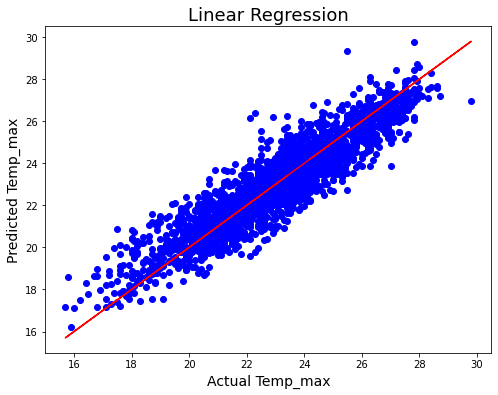

In [204]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='b')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual Temp_max",fontsize=14)
plt.ylabel("Predicted Temp_max",fontsize=14)
plt.title("Linear Regression",fontsize=18)
plt.show()

Thus we can see the best fit line covering the datapoints ,we can improve more by regularization and hyperparameter technique. There are some datapoints far away from best fit line,which can increase the mse error so we need to regularise and improve the r2_score.

In [205]:
#testing the model
lr.score(x_test,y_test)

0.8374558168948936

In [206]:
print("Mean absolute error :",mean_absolute_error(y_test,pred_test))
print("Mean squared error :",mean_squared_error(y_test,pred_test))
print("Root mean error :",np.sqrt(mean_squared_error(y_test,pred_test)))
print("R2_Score",r2_score(y_test,pred_test))

Mean absolute error : 0.75652839202633
Mean squared error : 0.9251686936264651
Root mean error : 0.9618568987258267
R2_Score 0.8374558168948936


# REGULARIZATION TECHNIQUE(LASSO AND RIDGE)

In [208]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score

In [209]:
rdg=Ridge(alpha=0.001,random_state=826)
rdg.fit(x_train,y_train)
rdg.score(x_train,y_train)

0.8151235338276025

In [210]:
#Lasso model training
ls=Lasso(alpha= 0.1, random_state= 826)
ls.fit(x_train,y_train)   
ls_score_training=ls.score(x_train,y_train) 
pred_ls=ls.predict(x_test) 
ls_score_training*100 

79.11595613236796

In [211]:
predict=rdg.predict(x_test)

In [212]:
r2_score(y_test,predict)

0.8380104385716189

In [213]:
lso=Lasso(alpha=0.0001,random_state=826)
lso.fit(x_train,y_train)
lso.score(x_train,y_train)

0.8151234546171554

In [214]:
predict1=lso.predict(x_test)
predict1

array([23.00368687, 22.07169434, 21.15076077, ..., 19.6195665 ,
       21.96354248, 23.21265125])

In [215]:
r2_score(y_test,predict1)

0.8380015794464859

The accuracy score of lasso regression is 83.80% which is good.

# Finding the best model


We will be using LinearRegression, SVR, DecisionTreeRegressor ,KNeighborsRegressor ,RandomForestRegressor, GradientBoostingRegressor algorithms for finding out the best model among those

In [216]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error 

In [217]:
LR=LinearRegression()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()
rfr=RandomForestRegressor()
gbr=GradientBoostingRegressor()

In [218]:
models= []
models.append(('Linear Regression',LR))
models.append(('Support Vector Regressor',svr))
models.append(('Decision Tree Regressor',dtr))
models.append(('KNeighbors Regressor',knr))
models.append(('RandomForestRegressor',rfr))
models.append(('GradientBoostingRegressor',gbr))

In [219]:
#Importing required metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

In [225]:
#Finding the required metrices for all models together using a for loop
Model=[]
score=[]
cvs=[]
rmse=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=r2_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,ymax,cv=2,scoring='r2').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    RMSE=np.sqrt(mean_squared_error(y_test,pre))
    print('Root Mean Squared Error: ',RMSE)
    rmse.append(RMSE)
    print('\n\n')

****************************** Linear Regression ***************************


LinearRegression()


accuracy_score:  0.8374558168948936


cross_val_score:  0.5470476526403665


Root Mean Squared Error:  0.9618568987258267



****************************** Support Vector Regressor ***************************


SVR()


accuracy_score:  0.9026349058424509


cross_val_score:  0.6311068529118777


Root Mean Squared Error:  0.7444343292386532



****************************** Decision Tree Regressor ***************************


DecisionTreeRegressor()


accuracy_score:  0.7638601725526531


cross_val_score:  0.35935564987386226


Root Mean Squared Error:  1.1593361254608436



****************************** KNeighbors Regressor ***************************


KNeighborsRegressor()


accuracy_score:  0.8571060132138675


cross_val_score:  0.46073553202439255


Root Mean Squared Error:  0.9018446324102585



****************************** RandomForestRegressor ***************************


Rand

In [226]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs,'Root_Mean_Squared_error':rmse})
result

,Model,Accuracy_score,Cross_val_score,Root_Mean_Squared_error
0,Linear Regression,83.745582,54.704765,0.961857
1,Support Vector Regressor,90.263491,63.110685,0.744434
2,Decision Tree Regressor,76.386017,35.935565,1.159336
3,KNeighbors Regressor,85.710601,46.073553,0.901845
4,RandomForestRegressor,90.127982,64.572486,0.749597
5,GradientBoostingRegressor,89.131833,66.821901,0.786508


The best model from the above algorithms is Support Vector Regressor,Random Forest Regressor and Gradient Bossting Regreser are giving accuracy score of 90.26%,90.12% and 89.13 respectively and cross validation score of 63.11%,64.57% and 66.82% respectivly and also rmse error of support vector,random forest and gradient boosting are 0.74 ,0.74 and 0.78 whcih are very less thus Lesser the RMSE score, the better model we can build. ,we will chhoose these model and try to find the best parameters and increase the accuracy score of the model by using Hyperparameter Tuning and find out the best model among three..

# Hyperparameter Tuning

Gradient Boosting Hyperparameter tuning

In [227]:
from sklearn.ensemble import GradientBoostingRegressor
parameters= { 'loss':['squared_error','absolute_error'],
              'learning_rate':[0.1,0.01], 
              'n_estimators':[2,5,10,20],
               'criterion':['mae','mse'],      
            }

gbr=GradientBoostingRegressor()
clf=GridSearchCV(gbr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
#{'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'squared_error', 'n_estimators': 20}

{'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'squared_error', 'n_estimators': 20}


In [223]:
gbr=GradientBoostingRegressor(learning_rate= 0.1, loss= 'squared_error',n_estimators= 20, criterion= 'mse')
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)
pred_decision=gbr.predict(x_test)

gbs=r2_score(y_test,pred_decision)
print('R2 Score',gbs*100)

gbscore=cross_val_score(gbr,x,ymin,cv=2)
gbc=gbscore.mean()
print('Cross Val Score:',gbc*100)

R2 Score 80.44996136541536
Cross Val Score: 73.93684369614769


SUPPORT VECTOR REGRESSION

In [224]:
# Support Vector Regression
from sklearn.svm import SVR
parameters={ 'kernel' :["linear", "rbf"],
              'gamma' :["scale", "auto"],
              'C' :[2.0, 4.0],
              'epsilon' :[0.2, 0.4]      
            }

svr=SVR()
clf=GridSearchCV(svr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
#{'C': 4.0, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}

{'C': 4.0, 'epsilon': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}


In [228]:
svr=SVR(C=4.0, epsilon= 0.2, gamma='scale', kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_decision=svr.predict(x_test)

svs=r2_score(y_test,pred_decision)
print('R2 Score',svs*100)

svscore=cross_val_score(svr,x,ymin,cv=2)
svc=svscore.mean()
print('Cross Val Score:',svc*100)

R2 Score 92.73179574719663
Cross Val Score: 72.68559938525728


RANDOM FOREST REGRESSOR

In [229]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
parameters= {'n_estimators': [200, 500],
             'criterion':['squared_error','absolute_error'], 
             'max_features':['auto','sqrt','log2'],
             'max_depth' : [4,5,6,7,8],
}
rfr=RandomForestRegressor(random_state=826)
GCVr=GridSearchCV(rfr,parameters,cv=2,scoring='accuracy')
GCVr.fit(x_train,y_train)
print(GCVr.best_params_)#Printing the best parameters obtained

{'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
nan


In [230]:
#fitting the best parameters
rfr=RandomForestRegressor(max_depth=4,n_estimators=200,criterion='squared_error',max_features='auto')
rfr.fit(x_train,y_train)  
rfr.score(x_train,y_train)
pred_test=rfr.predict(x_test)

rfs=r2_score(y_test,pred_test)
print('R2 Score',rfs*100)

rfscore=cross_val_score(rfr,x,ymin,cv=2)
rfc=rfscore.mean()
print('Cross Val Score:',rfc*100) 

R2 Score 80.99022189415899
Cross Val Score: 74.62078876357174


In [ ]:
Thus comparing all above model after hypertuning, we find that
Model                                  R2  Score              Cross Validation Score
Gradient Boosting regressor              80.44                     73.93
Support Vector Regressor                 92.73                     72.68 
Rnadom Forest Regressor                  80.99                     74.62
We find that Support Vector Regressor showing high accuracy of 92% and cross validation score is 73.6 which is also good.We will
select this model as our best fit model.

# Saving the model :Support Vector Regressor :Best Model

In [235]:
import pickle
filename='temperature_ymin.pkl'
pickle.dump(svr,open(filename,'wb'))

# CONCLUSION

In [236]:
loaded_model=pickle.load(open('temperature_ymin.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

92.73179574719663


This showing the very good predicted accuracy of ymin

# PREDICTION RESULT

In [237]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057,2058,2059,2060,2061,2062,2063,2064,2065,2066,2067,2068,2069,2070,2071,2072,2073,2074,2075,2076,2077,2078,2079,2080,2081,2082,2083,2084,2085,2086,2087,2088,2089,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100,2101,2102,2103,2104,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114,2115,2116,2117,2118,2119,2120,2121,2122,2123,2124,2125,2126,2127,2128,2129,2130,2131,2132,2133,2134,2135,2136,2137,2138,2139,2140,2141,2142,2143,2144,2145,2146,2147,2148,2149,2150,2151,2152,2153,2154,2155,2156,2157,2158,2159,2160,2161,2162,2163,2164,2165,2166,2167,2168,2169,2170,2171,2172,2173,2174,2175,2176,2177,2178,2179,2180,2181,2182,2183,2184,2185,2186,2187,2188,2189,2190,2191,2192,2193,2194,2195,2196,2197,2198,2199,2200,2201,2202,2203,2204,2205,2206,2207,2208,2209,2210,2211,2212,2213,2214,2215,2216,2217,2218,2219,2220,2221,2222,2223
Predicted,23.293965,22.183532,21.672081,21.067588,24.939138,21.665725,25.747462,24.078110,22.209369,23.311892,23.270998,25.875174,26.697902,22.879865,23.832059,24.873630,24.834826,21.443862,23.334321,19.989655,24.794534,19.682652,23.903741,19.753622,23.469784,24.234886,21.561722,23.344682,21.873336,24.595527,20.369287,23.530884,28.081520,22.922869,24.943556,24.084081,24.047071,25.331578,18.037861,27.439671,24.221282,23.725879,26.102843,26.803766,24.955074,23.223511,27.037298,23.120445,21.369923,24.309353,20.908912,24.90720,24.859181,21.252148,27.352286,23.216528,25.001437,21.235422,26.014134,21.744993,26.031106,24.885241,22.797398,24.722818,23.704271,20.102086,26.258839,20.359269,23.336431,20.239846,21.428130,23.091565,17.406587,27.854317,20.22833,19.731548,24.974403,20.675507,23.734156,22.969302,21.616338,25.243045,21.65441,26.459591,21.820481,24.100505,22.656202,23.288405,20.754167,26.801027,25.775519,20.960157,20.815124,23.988389,24.566727,20.800821,22.281212,24.611673,21.207818,19.387856,22.283082,25.491321,22.439504,21.653962,20.356172,23.760255,21.767578,21.860589,24.801347,18.740451,23.166185,20.088820,21.165548,18.82074,24.214311,21.064320,23.907974,21.186963,21.845664,21.232475,23.942436,24.518584,23.406707,20.433996,19.560043,24.113216,27.014316,21.403818,22.894184,22.586857,20.559345,22.156176,20.395019,22.492482,24.182702,17.566675,23.083745,25.989792,26.704453,22.407028,19.459523,22.727211,23.036664,17.579061,23.876060,20.377577,25.006152,25.807558,20.048782,26.127867,21.289555,24.236086,22.359990,23.057087,24.075479,26.38390,16.62366,22.103600,27.673557,24.064598,23.722086,17.229865,22.250958,26.817180,22.690826,21.782379,25.114040,26.935585,22.401312,21.567991,23.170998,22.246796,23.103614,22.397911,21.228389,22.821058,24.234185,23.256574,23.232634,25.901578,23.503792,25.338022,21.582555,21.289636,23.909375,2